# The data set

In [1]:
import pandas as pd

In [2]:
sales_data = pd.read_csv("coba_sklearn_dataset.csv")

In [3]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [4]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Bar plot

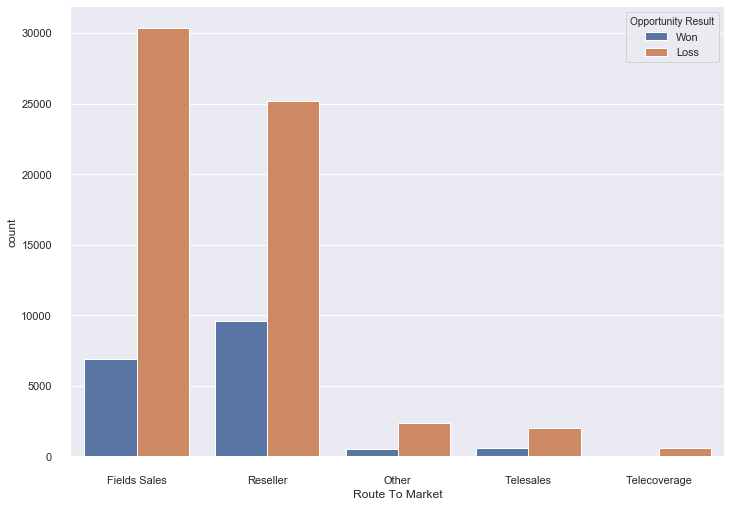

In [6]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market', data=sales_data, hue='Opportunity Result')
sns.despine(offset=10, trim=True)

# Violin plot

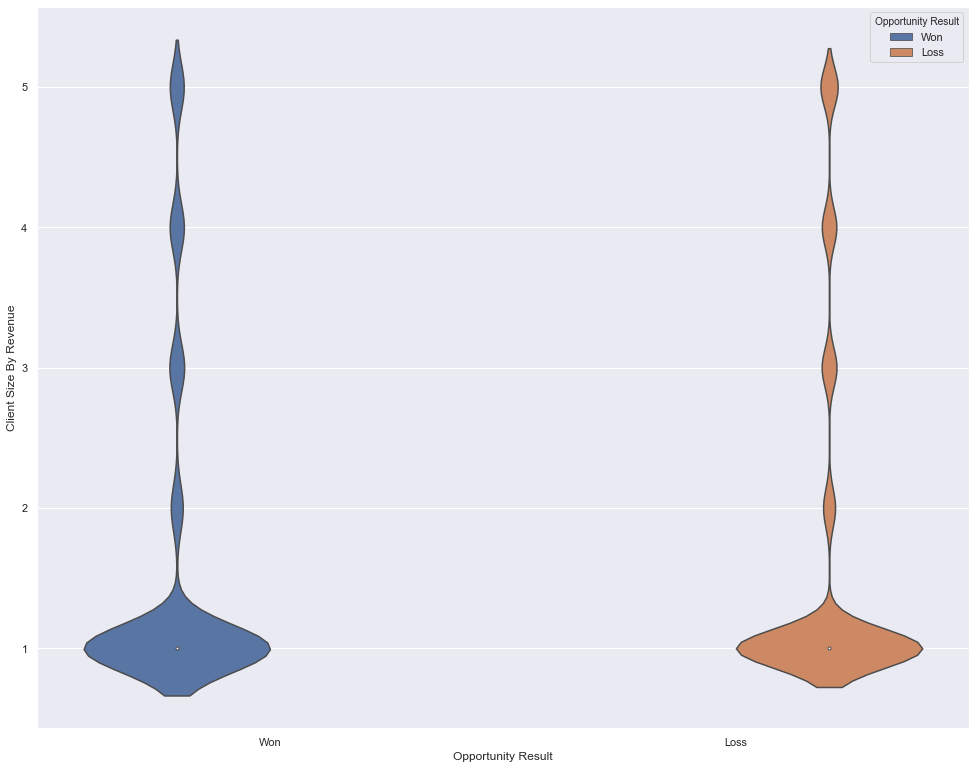

In [7]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result", y="Client Size By Revenue", hue="Opportunity Result", data=sales_data)

# Data preprocessing

## Fit transform

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

In [10]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [11]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
data = sales_data[cols]
target = sales_data['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


## Data splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

# Building the model

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [15]:
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)

In [16]:
print("Naive-Bayes accuracy: ", accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy:  0.7590567327409433


In [17]:
from yellowbrick.classifier import ClassificationReport

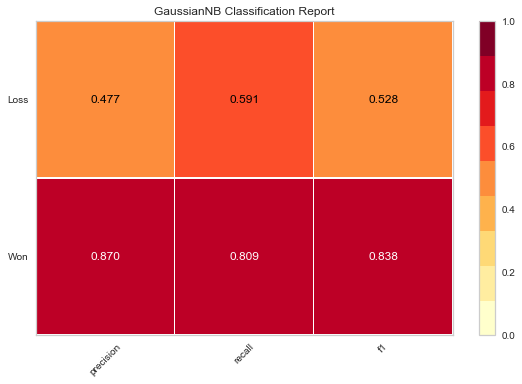

In [18]:
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(data_train, target_train)
visualizer.score(data_test, target_test)
g = visualizer.poof()

## Linear SVC

In [19]:
from sklearn.svm import LinearSVC

In [20]:
svc_model = LinearSVC(random_state=0, max_iter=10000)
pred = svc_model.fit(data_train, target_train).predict(data_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.7524777853725222


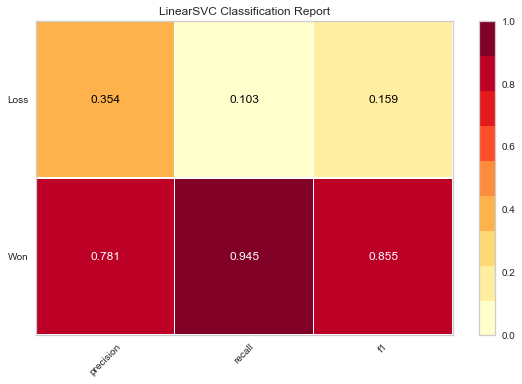

In [22]:
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(data_train, target_train)
visualizer.score(data_test, target_test)
g = visualizer.poof()

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train, target_train)
pred = neigh.predict(data_test)

In [25]:
print("KNN accuracy:", accuracy_score(target_test, pred, normalize=True))

KNN accuracy: 0.8145505809979494


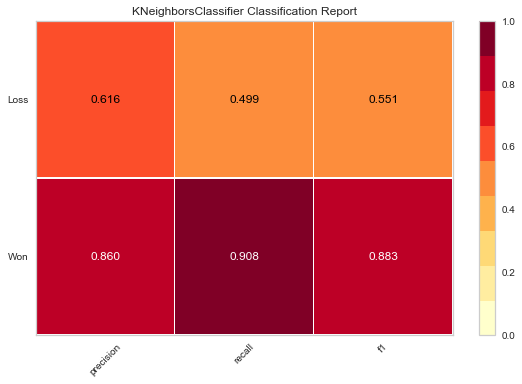

In [26]:
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(data_train, target_train)
visualizer.score(data_test, target_test)
g = visualizer.poof()